In [323]:
import pandas as pd
import numpy as np
import xarray
from sklearn.preprocessing import LabelEncoder
from itertools import combinations as C
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt
from geopy.distance import distance

In [325]:
precip_nc_file = '../dataset/pnwrain.50km.daily.4994.nc'
df = xarray.open_dataset(precip_nc_file, decode_times=False).to_dataframe()
df.reset_index(level=[0, 1], inplace=True)
df.dropna(inplace=True)
df['lat-lon'] = df['lat'].astype('str') + '_' + df['lon'].astype('str')
df['lat-lon'] = LabelEncoder().fit_transform(df['lat-lon'].values)
print('len of df', len(df))
df.sort_index(inplace=True)
#df.to_csv('../dataset/PrecData.csv')
df.head(2)

len of df 3130718


,lat,lon,data,lat-lon
time,,,,
0.0,48.808578,-122.500,2.0,189
0.0,46.903858,-118.125,0.6,132


In [326]:
loc_df = df.drop_duplicates(subset=['lat-lon']).set_index('lat-lon').drop(columns=['data']).sort_index()
#loc_df.to_csv('../dataset/PrecLoc.csv')

In [327]:
loc_df.head()
len(loc_df)

190

In [328]:
df = df[df['data'] != 0]

In [329]:
data_train_test = df[0:3650+3650-1]
cross_df = pd.crosstab(data_train_test.index, 
                       data_train_test['lat-lon'], 
                       data_train_test.data, aggfunc=lambda x: list(x)[0])
cross_df

lat-lon,0,1,2,3,4,5,6,7,8,9,...,180,181,182,183,184,185,186,187,188,189
row_0,,,,,,,,,,,,,,,,,,,,,
0.0,NaN,NaN,NaN,0.2,4.5,8.8,7.5,9.900001,17.500000,17.600000,...,10.400001,6.8,1.000000,NaN,NaN,0.4,3.700000,13.600000,3.700000,2.000000
1.0,NaN,NaN,NaN,1.9,1.0,0.2,1.3,2.300000,1.500000,1.800000,...,NaN,NaN,NaN,NaN,NaN,0.1,2.700000,5.700000,14.200000,0.300000
2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.300000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.100000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,10.800000,0.500000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7295.0,0.700000,2.5,2.5,0.3,4.8,12.3,2.5,2.600000,5.100000,12.100000,...,1.200000,3.7,4.100000,5.8,6.7,5.4,11.000000,2.000000,12.500000,13.400001
7296.0,15.400001,15.3,8.8,1.7,7.2,14.1,5.8,15.900001,14.900001,28.500000,...,7.300000,13.6,9.300000,5.1,2.0,5.3,15.100000,21.100000,34.000000,8.700000
7297.0,2.600000,6.8,6.5,0.2,1.0,3.0,0.9,2.900000,8.800000,19.700001,...,27.500000,20.9,8.400001,9.5,3.4,5.3,13.300000,30.200001,48.200001,8.100000


In [330]:
clean_train_test = cross_df.groupby(cross_df.index//60).mean().dropna(axis=1)
clean_train_test

lat-lon,3,5,6,7,13,14,15,16,17,18,...,180,181,182,183,184,185,186,187,188,189
row_0,,,,,,,,,,,,,,,,,,,,,
0.0,4.605263,2.947619,2.850000,4.248000,1.400000,3.038889,2.490476,3.768421,2.547369,2.828000,...,8.785714,6.803448,3.670371,2.336364,1.778947,3.308000,15.087097,22.486668,15.154286,5.861765
1.0,3.426667,2.368966,1.508333,1.200000,0.764706,2.364286,2.086364,3.229412,2.440000,1.922222,...,8.315789,6.847369,2.647826,2.300000,1.980000,3.261111,4.220690,8.478788,9.019444,5.014286
2.0,2.695000,5.400000,6.009091,3.386957,3.088235,4.917647,2.780000,2.696154,6.503846,4.220833,...,5.576471,4.490000,3.547369,3.420000,2.691667,3.983333,2.800000,4.947619,5.418519,3.308333
3.0,3.066667,3.550000,0.933333,2.350000,0.950000,1.250000,1.440000,2.025000,1.025000,4.033333,...,4.740000,3.075000,3.008333,2.935714,2.930769,3.253846,3.811765,4.936364,4.052174,3.578261
4.0,1.550000,2.846154,2.425000,2.021429,1.670000,2.580000,1.366667,2.120000,1.463636,1.621429,...,17.760000,13.781818,6.041667,4.508333,2.416667,2.323077,5.095000,11.882143,14.284616,9.900001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117.0,1.453846,3.557143,5.170000,2.646154,2.390000,2.300000,2.269231,2.373333,3.764706,4.225000,...,3.540741,2.814286,2.445000,3.825000,4.014286,5.066667,5.732258,9.278378,9.097561,4.548780
118.0,3.000000,5.161539,2.690909,2.854546,3.100000,1.592308,1.457143,2.353846,1.308333,1.514286,...,7.021875,6.028125,3.981482,2.294737,1.709375,2.452174,6.396000,7.971429,8.754054,5.213793
119.0,3.386667,5.507143,4.384615,2.450000,3.769231,3.541667,3.137500,4.260000,4.908333,7.700000,...,7.030435,4.680769,3.948000,5.485714,3.355000,2.641176,4.234615,11.104167,13.200000,7.692308


## Train data prepape

In [333]:
NN = 80
G_train = ((clean_train_test[0:NN] - clean_train_test[0:NN].mean()).T).dot(clean_train_test[0:NN] - clean_train_test[0:NN].mean())/len(clean_train_test[0:NN])

In [334]:
G_train.shape

(151, 151)

In [335]:
G_train.to_pickle('../dataset/PrecData_Gamma_train.csv')

In [336]:
G_test = ((clean_train_test[NN+1:] - clean_train_test[NN+1:].mean()).T).dot(clean_train_test[NN+1:] - clean_train_test[NN+1:].mean())/len(clean_train_test[NN+1:])

In [337]:
G_test.shape

(151, 151)

In [338]:
G_test.to_pickle('../dataset/PrecData_Gamma_test.csv')

In [339]:
corr_df = clean_train_test[0:NN].corr()

In [340]:
dis_df = pd.DataFrame(columns=['dis','corr'])
dis = []
corr = []
for a1, a2 in C(corr_df.index, 2):
    dis.append(euclidean(loc_df.loc[a1], loc_df.loc[a2]))
    corr.append(corr_df.loc[a1, a2])
dis_df['dis'] = dis
dis_df['corr'] = corr
dis_df.sort_values('dis', inplace=True)

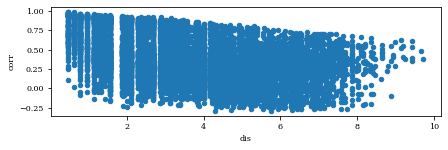

In [341]:
dis_df.plot('dis', 'corr', kind='scatter')

In [342]:
train_data = pd.DataFrame(clean_train_test[0:NN].mean(), columns=['data'])
train_data['lat'] = loc_df['lat']
train_data['lon'] = loc_df['lon']
train_data

,data,lat,lon
lat-lon,,,
3,2.562879,42.142059,-119.375
5,4.214014,42.142059,-120.625
6,3.835188,42.142059,-121.250
7,3.845844,42.142059,-121.875
13,2.446417,42.618240,-118.125
...,...,...,...
185,4.685421,48.808578,-120.000
186,7.678614,48.808578,-120.625
187,11.928426,48.808578,-121.250


In [343]:
train_data.to_pickle('../dataset/PrecData_train.pickle')

## Test data prepare

In [344]:
test_data = clean_train_test[NN+1:]
value_vars = test_data.columns.to_list()
test_data['time'] = test_data.index
test_data_melted = pd.melt(test_data, id_vars=['time'], value_vars=value_vars).rename(columns={'value':'data'})

/home/patel_zeel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [345]:
test_data_melted.set_index('lat-lon', inplace=True, drop=False)
test_data_melted['lat'] = loc_df['lat']
test_data_melted['lon'] = loc_df['lon']
test_data_melted.set_index('time', inplace=True)
test_data_melted

,lat-lon,data,lat,lon
time,,,,
81.0,3,3.780000,42.142059,-119.375
82.0,3,1.800000,42.142059,-119.375
83.0,3,6.443750,42.142059,-119.375
84.0,3,2.360000,42.142059,-119.375
85.0,3,3.911111,42.142059,-119.375
...,...,...,...,...
117.0,189,4.548780,48.808578,-122.500
118.0,189,5.213793,48.808578,-122.500
119.0,189,7.692308,48.808578,-122.500


In [346]:
test_data_melted.to_pickle('../datset/PrecData_test.pickle')

In [347]:
len(test_data_melted.index.unique())

41